<a href="https://colab.research.google.com/github/AbrilPaes/Machine-learning/blob/main/Practica_final_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/11-Practica-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Práctica *final* de clasificación

Vamos a retomar el dataset de la sesión pasada (dataset PIMA). El objetivo es tener el mejor modelo posible con cada uno de los siguientes algoritmos:

* SVM
* Decision Tree
* Random Forest
* Regresión Logística

Con esto haremos una comparación entre ellos.

Los pasos a seguir son:

1. Prepara el dataset para los algoritmo, recuerda que hay algunos valores faltantes. Además, recuerda reescalar los datos apropiadamente.

2. Usando como dataset el dataset preprocesado del paso anterior, realiza una busqueda de parámetros con cada algoritmo de acuerdo a las siguientes opciones:

* SVM
 * C: 0.1,1,10,100
 * kernel: lineal, polinomial, rbf
 * grados (polinomial): 2,3,5
* Decision Tree
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Random Forest
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Regresión Logística
 * C: 0.1,1,10
 * penalty: l1, l2, elasticnet, None

3. Considerando los 4 mejores modelos anteriores. ¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto toma en cuenta el accuracy en el conjunto de prueba.

In [10]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.shape

(768, 9)

In [12]:
df[df['insulin']==0].shape

(374, 9)

<ipython-input-13-20fa730aaf18>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=features_scaled, shade=True)


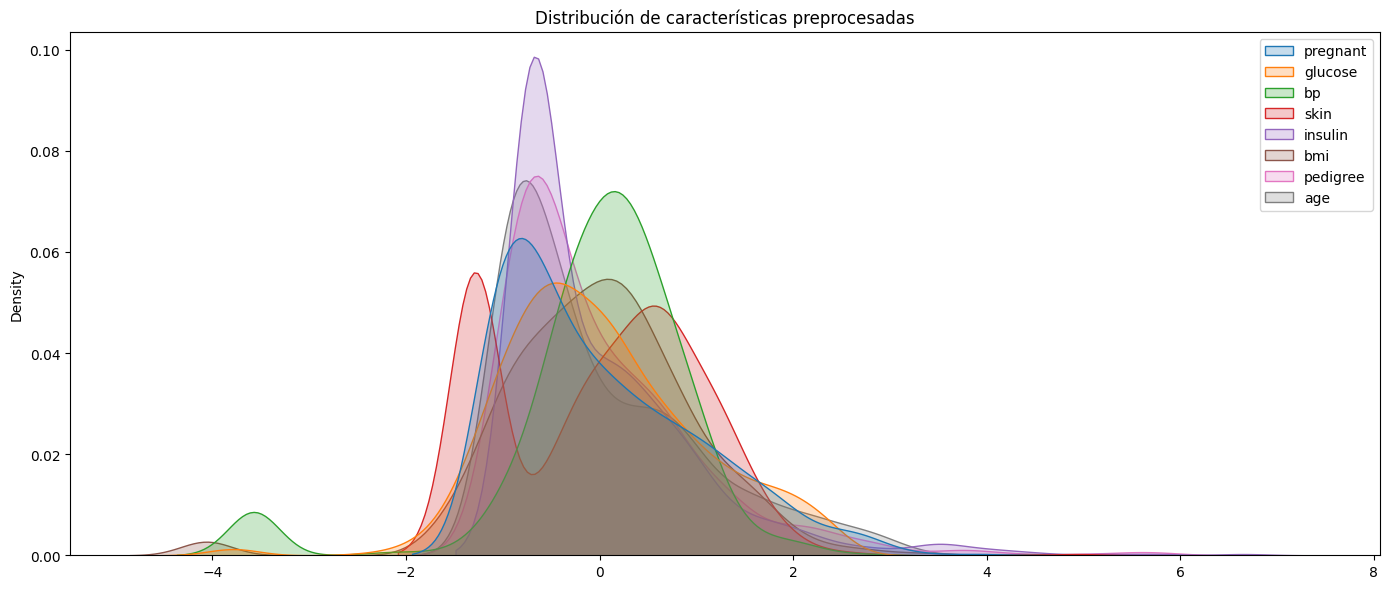

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Asumamos que la variable objetivo se llama 'label'
target_variable = df['label']
features = df.drop(columns=['label'])

# Imputar valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Estandarizar las características
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_imputed), columns=features.columns)

# Gráficas de distribución después del procesamiento de datos
plt.figure(figsize=(14, 6))
plt.title('Distribución de características preprocesadas')
sns.kdeplot(data=features_scaled, shade=True)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, random_state=1001)

# Definir los valores de los hiperparámetros a probar
param_distribution = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 5]
}

# Crear el modelo SVM
svm_model = SVC()

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntaje encontrado:", best_score)

Mejores parámetros encontrados: {'kernel': 'linear', 'degree': 3, 'C': 100}
Mejor puntaje encontrado: 0.7508330001332799


Mejores parámetros encontrados: {'min_samples_split': 2, 'max_depth': 10, 'criterion': 'log_loss'}
Mejor puntaje encontrado: 0.6987071837931494


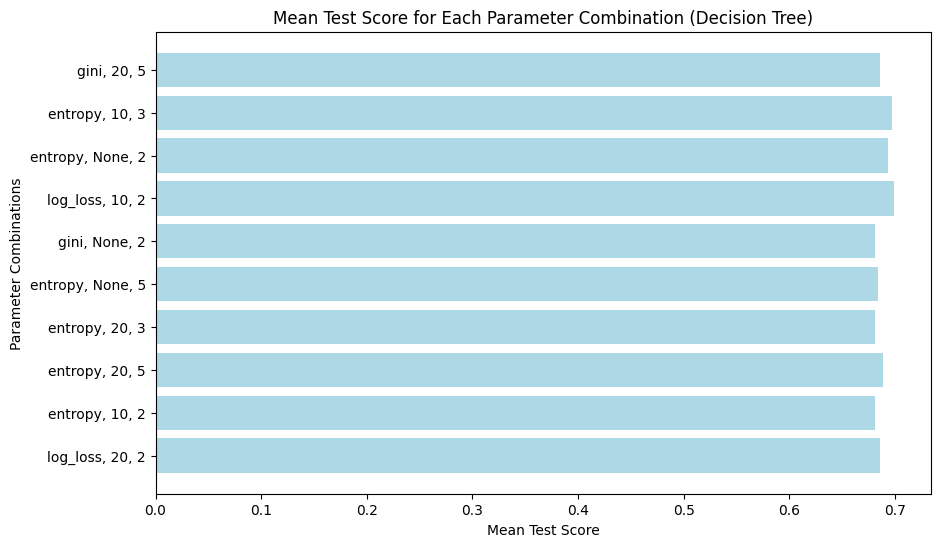

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, random_state=1001)

# Definir los valores de los hiperparámetros a probar
param_distribution = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5]
}

# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=tree_model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntaje encontrado:", best_score)




# Almacenar los resultados de la búsqueda aleatoria
results = random_search.cv_results_

# Obtener los puntajes de validación cruzada para cada combinación de parámetros
mean_scores = results['mean_test_score']

# Crear una lista con los nombres de las combinaciones de parámetros
param_combinations = [f"{params['criterion']}, {params['max_depth']}, {params['min_samples_split']}" for params in results['params']]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.barh(param_combinations, mean_scores, color='lightblue')
plt.xlabel('Mean Test Score')
plt.ylabel('Parameter Combinations')
plt.title('Mean Test Score for Each Parameter Combination (Decision Tree)')
plt.gca().invert_yaxis()  # Invertir el eje y para que los mejores resultados estén arriba
plt.show()

Mejores parámetros encontrados: {'min_samples_split': 2, 'max_depth': 20, 'criterion': 'log_loss'}
Mejor puntaje encontrado: 0.7508729841396774


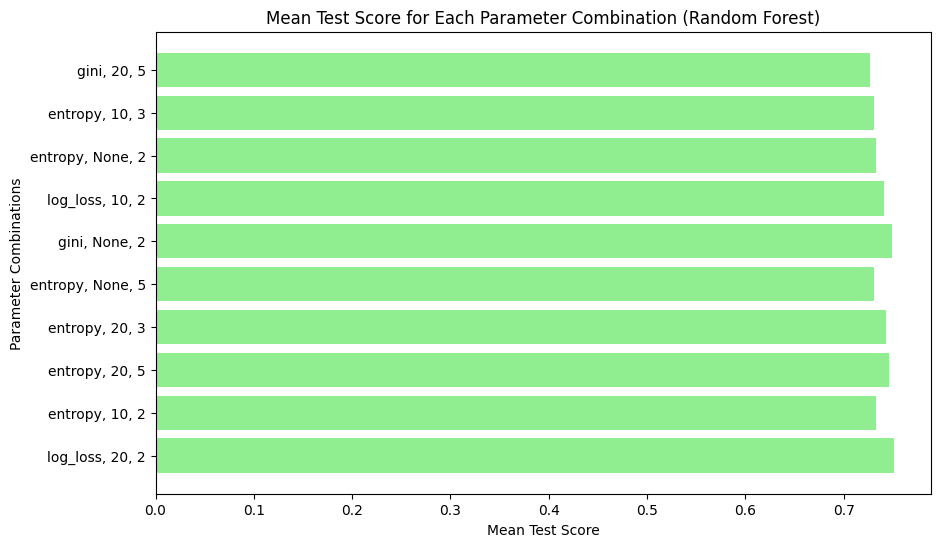

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, random_state=1001)

# Definir los valores de los hiperparámetros a probar
param_distribution = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5]
}

# Crear el modelo Random Forest
rf_model = RandomForestClassifier()

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntaje encontrado:", best_score)




# Almacenar los resultados de la búsqueda aleatoria
results = random_search.cv_results_

# Obtener los puntajes de validación cruzada para cada combinación de parámetros
mean_scores = results['mean_test_score']

# Crear una lista con los nombres de las combinaciones de parámetros
param_combinations = [f"{params['criterion']}, {params['max_depth']}, {params['min_samples_split']}" for params in results['params']]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.barh(param_combinations, mean_scores, color='lightgreen')
plt.xlabel('Mean Test Score')
plt.ylabel('Parameter Combinations')
plt.title('Mean Test Score for Each Parameter Combination (Random Forest)')
plt.gca().invert_yaxis()  # Invertir el eje y para que los mejores resultados estén arriba
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of

Mejores parámetros encontrados: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Mejor puntaje encontrado: 0.7590030654404905


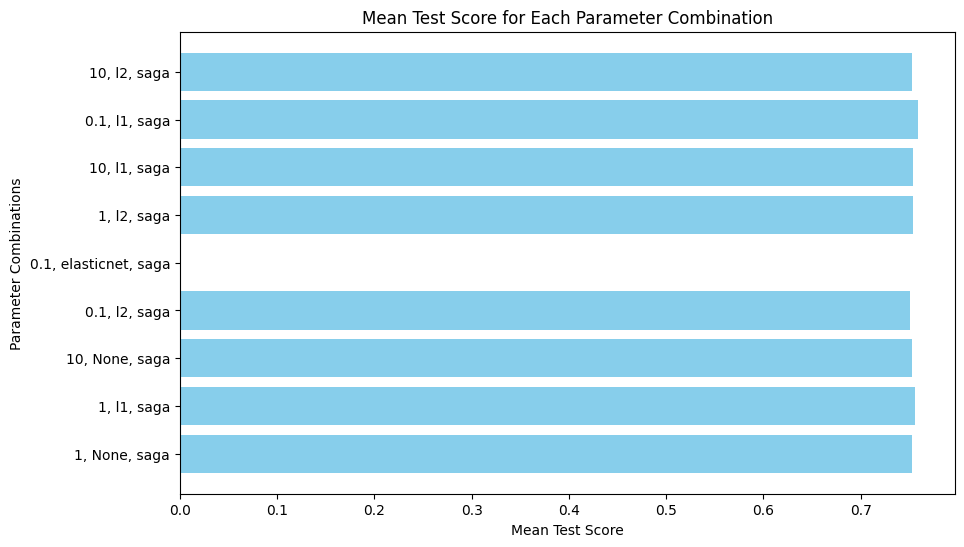

In [17]:
"""SVM
C: 0.1,1,10,100
kernel: lineal, polinomial, rbf
grados (polinomial): 2,3,5"""

from sklearn.linear_model import LogisticRegression

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, random_state=1001)

# Definir los valores de los hiperparámetros a probar
param_distribution = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['saga']  # saga solver is necessary for 'elasticnet' penalty and to handle None penalty
}

# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression()

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntaje encontrado:", best_score)







# Almacenar los resultados de la búsqueda aleatoria
results = random_search.cv_results_

# Obtener los puntajes de validación cruzada para cada combinación de parámetros
mean_scores = results['mean_test_score']

# Crear una lista con los nombres de las combinaciones de parámetros
param_combinations = [f"{params['C']}, {params['penalty']}, {params['solver']}" for params in results['params']]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.barh(param_combinations, mean_scores, color='skyblue')
plt.xlabel('Mean Test Score')
plt.ylabel('Parameter Combinations')
plt.title('Mean Test Score for Each Parameter Combination')
plt.gca().invert_yaxis()  # Invertir el eje y para que los mejores resultados estén arriba
plt.show()



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Cargar el dataset
url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url, index_col=0)

# Asumamos que la variable objetivo se llama 'label'
target_variable = df['label']
features = df.drop(columns=['label'])

# Imputar valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Estandarizar las características
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_imputed), columns=features.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, random_state=1001)

# Parámetros para SVM
param_distribution_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 5]
}

# Parámetros para Decision Tree
param_distribution_tree = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5]
}

# Parámetros para Random Forest
param_distribution_rf = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5]
}

# Parámetros para Logistic Regression
param_distribution_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Crear los modelos
svm_model = SVC()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

# Realizar las búsquedas aleatorias de hiperparámetros
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distribution_svm, n_iter=10, cv=5, random_state=42)
random_search_svm.fit(X_train, y_train)
best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_

random_search_tree = RandomizedSearchCV(estimator=tree_model, param_distributions=param_distribution_tree, n_iter=10, cv=5, random_state=42)
random_search_tree.fit(X_train, y_train)
best_params_tree = random_search_tree.best_params_
best_score_tree = random_search_tree.best_score_

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distribution_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

random_search_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=param_distribution_lr, n_iter=10, cv=5, random_state=42)
random_search_lr.fit(X_train, y_train)
best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

# Mostrar los mejores parámetros y puntajes
print("SVM - Mejores parámetros encontrados:", best_params_svm)
print("SVM - Mejor puntaje encontrado:", best_score_svm)
print()
print("Decision Tree - Mejores parámetros encontrados:", best_params_tree)
print("Decision Tree - Mejor puntaje encontrado:", best_score_tree)
print()
print("Random Forest - Mejores parámetros encontrados:", best_params_rf)
print("Random Forest - Mejor puntaje encontrado:", best_score_rf)
print()
print("Logistic Regression - Mejores parámetros encontrados:", best_params_lr)
print("Logistic Regression - Mejor puntaje encontrado:", best_score_lr)

# Comparar los puntajes
scores = {
    "SVM": best_score_svm,
    "Decision Tree": best_score_tree,
    "Random Forest": best_score_rf,
    "Logistic Regression": best_score_lr
}

best_classifier = max(scores, key=scores.get)
print("\nEl clasificador con mejor rendimiento es:", best_classifier, "con un puntaje de:", scores[best_classifier])

SVM - Mejores parámetros encontrados: {'kernel': 'linear', 'degree': 3, 'C': 100}
SVM - Mejor puntaje encontrado: 0.7508330001332799

Decision Tree - Mejores parámetros encontrados: {'min_samples_split': 5, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree - Mejor puntaje encontrado: 0.7052112488337998

Random Forest - Mejores parámetros encontrados: {'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
Random Forest - Mejor puntaje encontrado: 0.7459682793549247

Logistic Regression - Mejores parámetros encontrados: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Logistic Regression - Mejor puntaje encontrado: 0.7540983606557378

El clasificador con mejor rendimiento es: Logistic Regression con un puntaje de: 0.7540983606557378


Hay más clasificadores que es importante revisar. Con las herramientas que ya cuentas, ya puedes revisarlos por tu cuenta:

* [K-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
* ...

[Más información](https://scikit-learn.org/stable/supervised_learning.html), [comparación](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).